In [1]:
import numpy as np
import pandas as pd
from scipy import stats, signal
from matplotlib.pyplot import *

%matplotlib inline

In [111]:
def get_mag(d):
    return np.sqrt(np.array(d.x**2+d.y**2+d.z**2))
def specgram_plot(fname):
    d = pd.read_csv(fname)
    Fs = 1/np.mean(np.diff(d.timestamp))
    print Fs
    mag = get_mag(d)
    mag = mag - np.mean(mag)
    nfft = int(round(Fs - 10))
    nover = nfft - 2
    # Specgram
    _ = specgram(mag, NFFT=nfft, noverlap=nover, Fs=Fs)

71.175


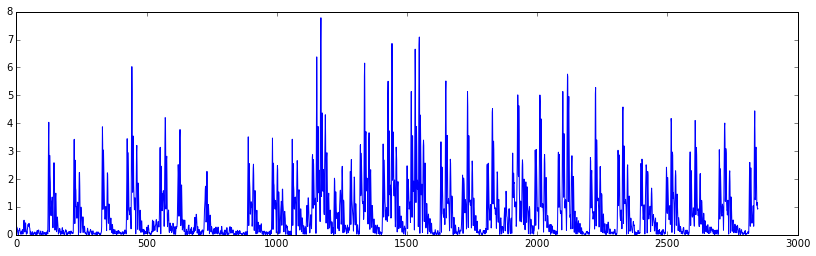

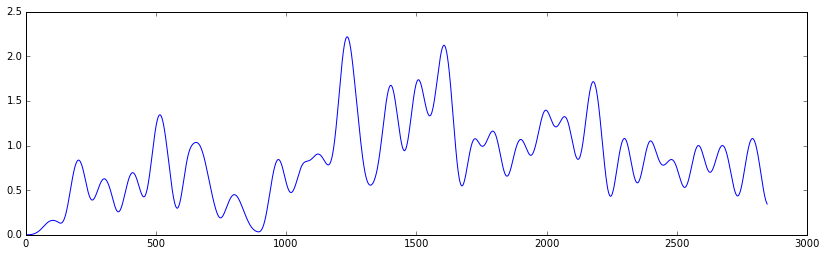

In [104]:
d = pd.read_csv('../data_accel/accurate_belly_4.csv')
Fs = 1/np.mean(np.diff(d.timestamp))
print Fs
mag = get_mag(d)
mag = mag - np.mean(mag)

b, a = signal.butter(4, (35/(Fs/2)), btype='lowpass')
mag = signal.lfilter(b, a, mag)
mag = (abs(mag[:]))
figure(figsize=(14,4))
plot(mag)


c, d = signal.butter(4, (.5/(Fs/2)), btype='lowpass')
mag_2 = signal.lfilter(c, d, mag)
figure(figsize=(14,4))
plot(mag_2)

259.233333333


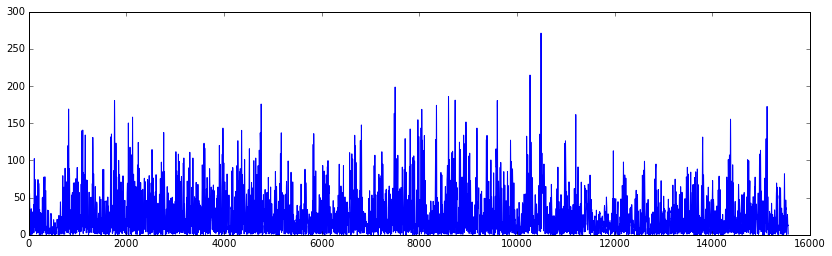

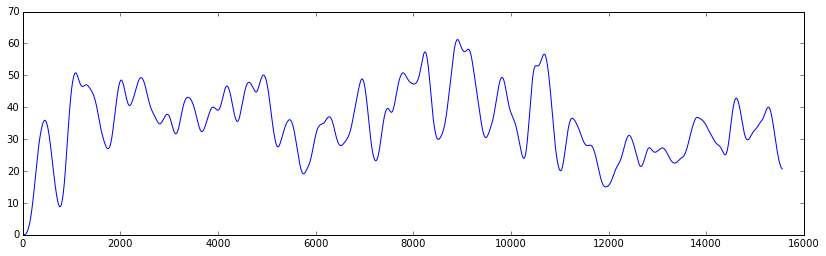

In [131]:
d = pd.read_csv('../data_accel/check_driving_2.csv')
Fs = 1/np.mean(np.diff(d.timestamp))
print Fs
mag = get_mag(d)
mag = mag - np.mean(mag)

b, a = signal.butter(4, (35/(Fs/2)), btype='lowpass')
mag = signal.lfilter(b, a, mag)
mag = (abs(mag[:]))
figure(figsize=(14,4))
plot(mag)

c, d = signal.butter(4, (.5/(Fs/2)), btype='lowpass')
mag_2 = signal.lfilter(c, d, mag)
figure(figsize=(14,4))
plot(mag_2)


# test = mag[120:160]
# test = test - np.mean(test)
# test = test / np.linalg.norm(test)
# figure(figsize=(14,4))
# plot(test)
# hlines(30, 0, len(test))
# (len(test), test)


72.1092963511


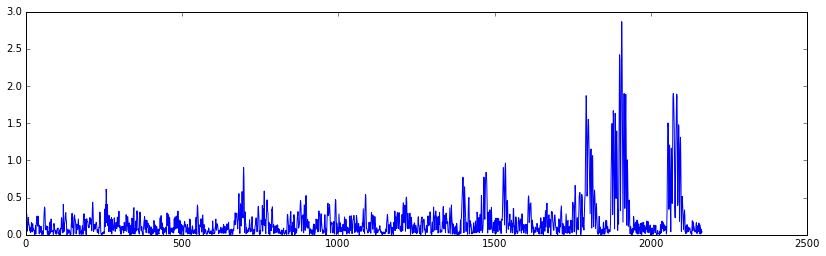

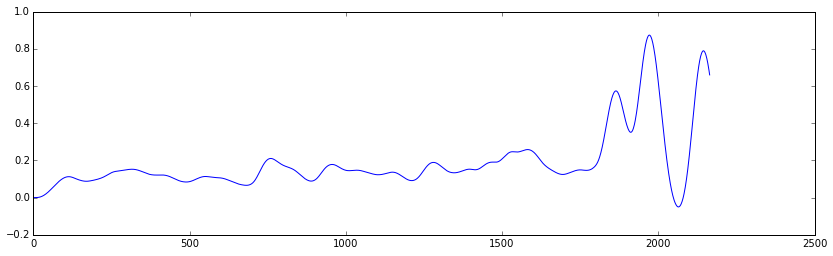

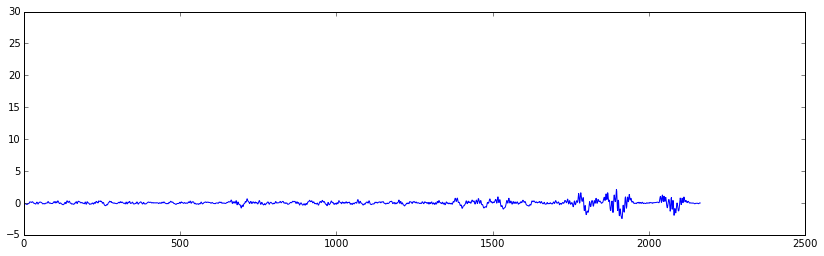

In [130]:
d = pd.read_csv('../data_accel/false_pos_rest_1.csv')
Fs = 1/np.mean(np.diff(d.timestamp))
print Fs
mag = get_mag(d)
mag = mag - np.mean(mag)


b, a = signal.butter(4, (35/(Fs/2)), btype='lowpass')
mag = signal.lfilter(b, a, mag)
mag = (abs(mag[:]))
figure(figsize=(14,4))
plot(mag)

c, d = signal.butter(4, (.5/(Fs/2)), btype='lowpass')
mag_2 = signal.lfilter(c, d, mag)
figure(figsize=(14,4))
plot(mag_2)

s = signal.convolve(mag, test[::-1], mode='same')
figure(figsize=(14,4))
plot(s)
hlines(30, 0, len(s))

70.3432189494


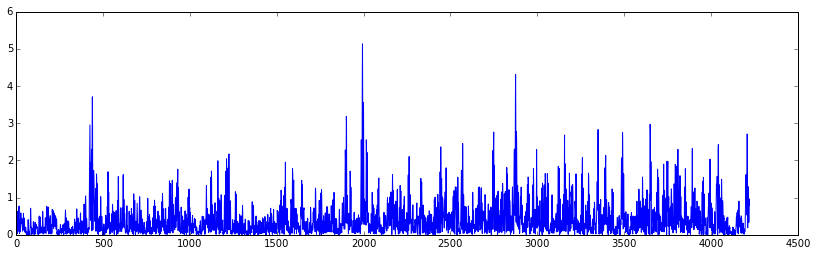

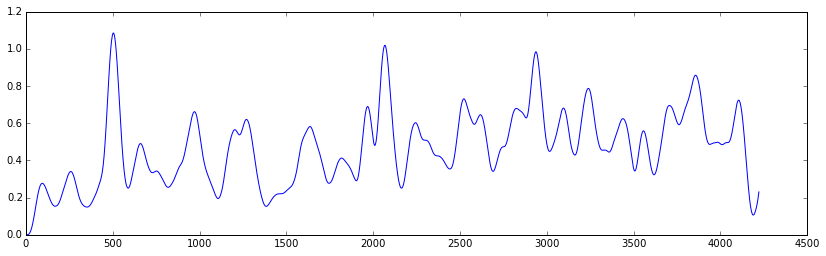

In [123]:
d = pd.read_csv('../data_accel/false_pos_driving_1.csv')
Fs = 1/np.mean(np.diff(d.timestamp))
print Fs
mag = get_mag(d)
mag = mag - np.mean(mag)


b, a = signal.butter(4, (35/(Fs/2)), btype='lowpass')
mag = signal.lfilter(b, a, mag)
mag = (abs(mag[:]))
figure(figsize=(14,4))
plot(mag)

c, d = signal.butter(4, (.5/(Fs/2)), btype='lowpass')
mag_2 = signal.lfilter(c, d, mag)
figure(figsize=(14,4))
plot(mag_2)

